In [96]:
from sklearn.datasets import *
import matplotlib.pyplot as plt
from sklearn.neural_network import *
import numpy as np
from sklearn.metrics import *
import pandas as pd
import seaborn as sns
import time
import plotly.figure_factory as ff
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
import time
import warnings
warnings.filterwarnings('ignore')

## Загрузка данных и первичный отбор признаков


Для исследования был использован набор данных, содержащий основные показатели результативности деятельности всех российских организаций высшего образования (за исключением негосударственных вузов и филиалов) за 2013-2017 годы.


In [97]:
data = pd.read_excel('data_uni.xlsx')
data.head(10)

,federal_district,federal_district_short,region_code,region_name,okato,id,name,name_short,year,e1,...,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
0,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2013,61.88,...,8.148000e+00,1.806000e+00,346.5420,34979.8,1183805.084,53753,86.11,420,12016.20,687114.00
1,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2014,55.81,...,1.572100e+01,2.973060e+01,591.9454,34739.6,1258764.500,53753,88.74,398,11741.00,675456.00
2,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2015,57.45,...,2.048200e+01,5.582500e+01,1323.0140,35750.5,1192261.000,51206,88.72,385,19762.05,569505.00
3,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2016,59.44,...,4.849000e+00,2.230540e+01,1456.9007,32631.6,760364.600,60484,90.93,373,21984.62,3514.65
4,Южный федеральный округ,ЮФО,1,Республика Адыгея (Адыгея),79000000000,1,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АГУ»,2017,60.15,...,3.993000e+00,1.702470e+01,1014.9843,39626.1,741335.000,60471,90.36,363,27054.39,4179.00
5,Сибирский федеральный округ,СФО,22,Алтайский край,1000000000,2,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АлтГПУ»,2013,65.58,...,1.012545e+06,1.005120e+01,280.3168,20093.2,491475.712,42865,78.37,349,1539.09,575106.00
6,Сибирский федеральный округ,СФО,22,Алтайский край,1000000000,2,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АлтГПУ»,2014,61.02,...,1.052800e+00,7.336700e+00,519.9187,27982.1,536624.200,49865,79.32,329,648.13,3541.95
7,Сибирский федеральный округ,СФО,22,Алтайский край,1000000000,2,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АлтГПУ»,2015,60.42,...,4.126500e+00,1.543500e+01,662.4135,28496.1,541536.600,49861,78.80,315,27310.50,3475.65
8,Сибирский федеральный округ,СФО,22,Алтайский край,1000000000,2,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АлтГПУ»,2016,61.54,...,2.591579e+06,2.591579e+06,669.2005,28669.5,535494.300,49861,78.61,305,23951.65,636436.00
9,Сибирский федеральный округ,СФО,22,Алтайский край,1000000000,2,Федеральное государственное бюджетное образова...,ФГБОУ ВО «АлтГПУ»,2017,61.86,...,7.262500e+04,7.473200e+00,1204.0958,28098.2,528212.100,42861,78.76,314,20881.00,3720.65


Единица наблюдения в наборе (строка): организация высшего образования (университет) за определенный год.

Для каждого наблюдения представлены следующие атрибуты:

- federal_district и federal_district_short $-$ название и сокращённое название федерального округа;
- region_code $-$ код региона;
- region_name $-$ название субъекта РФ;
- okato $-$ ОКАТО;
- id $-$ идентификационный номер образовательной организации;
- name и name_short $-$ название и сокращённое название образовательной организации;
- year $-$ год;
- e1 $-$ отношение суммы средних баллов ЕГЭ студентов, принятых на обучение по очной форме обучения по результатам ЕГЭ, к суммарной численности таких студентов;
- e2 $-$ отношение общего объема средств, поступивших за отчетный год от выполнения НИОКР к численности НПР;
- e3 $-$ отношение приведенного контингента студентов – граждан иностранных государств, к приведенному контингенту студентов, выраженное в процентах;
- e4 $-$ отношение объема средств организации, поступивших за отчетный год из бюджетных и внебюджетных источников, без учета собственных средств, к численности НПР;
- e5 $-$ отношение фонда начисленной заработной платы работников профессорско-преподавательского состава, без учета работающих на условиях штатного совместительства деленное на 12 и деленное на соответствующую среднемесячную начисленную заработную плату наемных работников в организациях, у индивидуальных предпринимателей и физических лиц
- e6 $-$ отношение численности трудоустроившихся в течение календарного года, следующего за годом выпуска, выпускников образовательной организации высшего образования, к общей численности выпускников образовательной организации года, предшествующего отчетному, обучавшихся по очной форме обучения по программам бакалавриата
- e8 $-$ отношение приведенной к числу ставок численности работников ППС, имеющих ученую степень доктора наук или кандидата наук, к численности студентов, обучающихся по программам бакалавриата, специалитета и магистратуры
- ege_budg $-$ средний балл ЕГЭ студентов, принятых по результатам ЕГЭ на обучение по очной форме по программам бакалавриата и специалитета за счет средств соответствующих бюджетов бюджетной системы РФ
- wos $-$ число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Web of Science, в расчете на 100 НПР
- scopus $-$ число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования Scopus, в расчете на 100 НПР
- rsci $-$ число публикаций организации, индексируемых в информационно-аналитической системе научного цитирования РИНЦ, в расчете на 100 НПР
- rnd $-$ общий объем научно-исследовательских и опытно-конструкторских работ
- total_income $-$ доходы вуза из всех источников
- square $-$ общая площадь учебно-лабораторных помещений
- phd_share $-$ удельный вес численности обучающихся (приведенного контингента) подготовки научно-педагогических кадров в аспирантуре (адъюнктуре), ординатуры, ассистентуры-стажировки в общей численности приведенного контингента обучающихся по основным образовательным программам высшего образования
- pps $-$ общая численность профессорско-преподавательского состава
- rnd_private $-$ доходы от НИОКР
- pk $-$ общая численность студентов

Набор охватывает все доступные сведения за 2013-2017 гг. Всего набор содержит 2 564 наблюдений по 27 атрибутам.


Целью моего моделирования будет прогнозирование среднего балла поступивших студентов в зависимости от различных показателей результативности вуза, а также его местоположения (федерального округа).


Рассмотрим форматы представленных данных:


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   federal_district        2564 non-null   object 
 1   federal_district_short  2564 non-null   object 
 2   region_code             2564 non-null   int64  
 3   region_name             2564 non-null   object 
 4   okato                   2564 non-null   int64  
 5   id                      2564 non-null   int64  
 6   name                    2564 non-null   object 
 7   name_short              2564 non-null   object 
 8   year                    2564 non-null   int64  
 9   e1                      2564 non-null   float64
 10  e2                      2564 non-null   float64
 11  e3                      2564 non-null   float64
 12  e4                      2564 non-null   float64
 13  e5                      2564 non-null   float64
 14  e6                      2497 non-null   

Проверим на наличие пропусков:


In [99]:
data.isna().sum()

federal_district           0
federal_district_short     0
region_code                0
region_name                0
okato                      0
id                         0
name                       0
name_short                 0
year                       0
e1                         0
e2                         0
e3                         0
e4                         0
e5                         0
e6                        67
e8                         0
ege_budg                   0
wos                        0
scopus                     0
rsci                       0
rnd                        0
total_income               0
square                     0
phd_share                  0
pps                        0
rnd_private                0
pk                         0
dtype: int64

Видим, что пропуски есть в признаке е6, их необходимо будет заполнить, сделаем это позднее


Особой информации для моего моделирования не несут следующие признаки: federal_district_short, region_name, okato, name, name_short. Поэтому их необходимо устранить.

Отдельное внимание обратим на признак e1. Это отношение суммы баллов к количеству поступивших, то есть фактически средний баллл, что дублирует целевую переменную, поэтому его тоже нужно удалить для лучших результатов моделирования.


In [100]:
data = data.drop(columns = ["federal_district_short", "okato", "region_name", "id", "name_short", "region_code", "name", "year", "e1"]) 
data

,federal_district,e2,e3,e4,e5,e6,e8,ege_budg,wos,scopus,rsci,rnd,total_income,square,phd_share,pps,rnd_private,pk
0,Южный федеральный округ,75.55,6.63,2556.79,14.22,94.464,6.91,63.03,8.1480,1.8060,346.5420,34979.8,1183805.084,53753,86.11,420,12016.20,687114.00
1,Южный федеральный округ,76.32,9.17,316057.00,142.78,55.000,7.33,57.60,15.7210,29.7306,591.9454,34739.6,1258764.500,53753,88.74,398,11741.00,675456.00
2,Южный федеральный округ,86.40,12.43,2881.25,166.81,55.000,45298.00,58.58,20.4820,55.8250,1323.0140,35750.5,1192261.000,51206,88.72,385,19762.05,569505.00
3,Южный федеральный округ,84.80,15.85,1976.00,146.02,0.000,6.75,60.76,4.8490,22.3054,1456.9007,32631.6,760364.600,60484,90.93,373,21984.62,3514.65
4,Южный федеральный округ,109.27,45436.00,2044.22,158.43,65.000,5.75,61.82,3.9930,17.0247,1014.9843,39626.1,741335.000,60471,90.36,363,27054.39,4179.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,Южный федеральный округ,84.99,7.54,81482.00,177.96,NaN,45447.00,0.00,19.5254,34.3580,647.0198,76607.7,1913694.300,116769,52.45,838,12394.02,1786158.00
2560,Южный федеральный округ,126.14,45328.00,2207.55,154.15,0.000,3.98,64.30,17.8100,41.2370,1070.0385,92135.6,1612505.300,116517,57.76,685,10754.50,1840579.00
2561,Южный федеральный округ,129.54,5.62,2415.13,162.82,55.000,45630.00,60.29,24.7660,62.7690,1337.9740,89355.8,1665959.500,117339,62.02,610,67191.50,7191.85
2562,Центральный федеральный округ,431.18,8.83,3661.14,161.80,75.000,2.64,69.76,81.6384,176.3517,2595.5271,454723.3,3861039.200,194673,65.94,1063,101059.41,13375.10


## Проверка корреляции между признаками


Построим корреляционную матрицу:


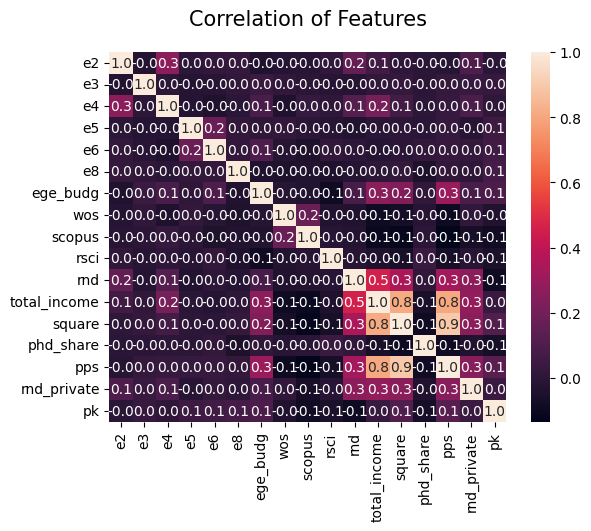

In [101]:
corr_matrix = data.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, fmt='.1f', linewidths=0)
plt.title('Correlation of Features', y=1.05, size=15)
plt.show()

Между признаками pps и total_income, pps и square, total_income и square наблюдается сильная корреляция.

Оставим имеющие с целевой переменной ege_budg наибольшую корреляцию, а именно: pps и total_income


In [102]:
data = data.drop(columns = ["square"]) 

Проверим, как изменились значения коэффициента корреляции после удаления:


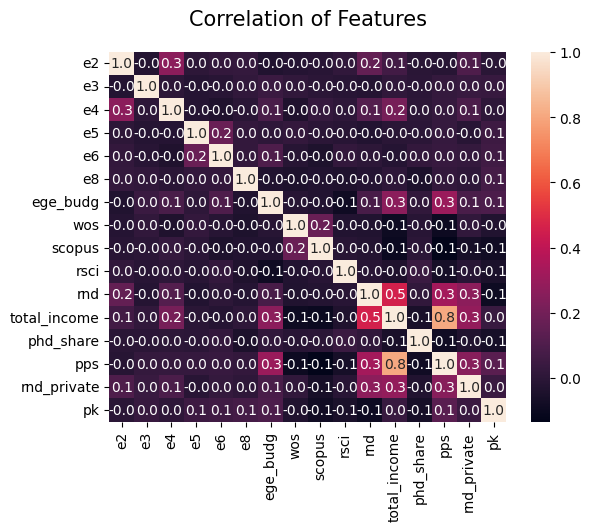

In [103]:
corr_matrix = data.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, fmt='.1f', linewidths=0)
plt.title('Correlation of Features', y=1.05, size=15)
plt.show()

Парная корреляция между признаками очень сильная. Оставим наиболее влияющий на целевую pps.


In [104]:
data = data.drop(columns = ["total_income"]) 

Посмотрим на итоговую матрицу:


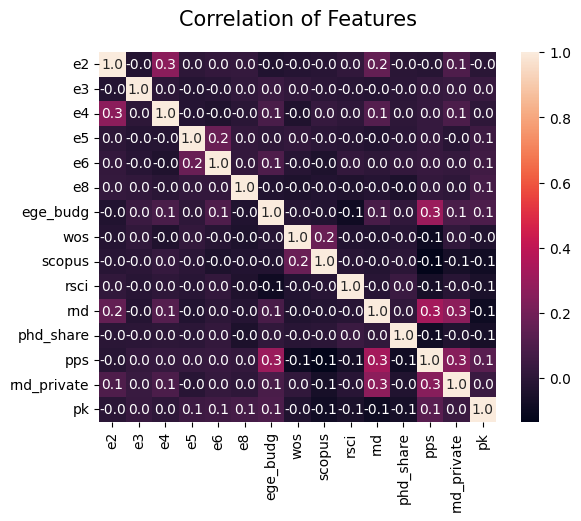

In [105]:
corr_matrix = data.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, fmt='.1f', linewidths=0)
plt.title('Correlation of Features', y=1.05, size=15)
plt.show()

Сильной корреляции между оставшимися признаками нет


## Заполнение пропусков


В данном случае можно выполнить замену пустых значений в столбце e6 несколькими способами и посмотреть, какая из них окажется наименее искажающей результат.


Смотрим данные столбца до удаления/заполнения:


In [106]:
data['e6'].describe()

count    2497.000000
mean       75.059146
std        23.472297
min         0.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: e6, dtype: float64

1. Удаление строк с пропущенными значениями:


In [107]:
data_1 = data[data['e6'].isna() == False]
data_1.describe().e6

count    2497.000000
mean       75.059146
std        23.472297
min         0.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: e6, dtype: float64

Так как процент пропусков во всей выборке небольшой, можно удалить строки с пропуском без серьёзного искажения данных.


2. Замена на константу (первое значение в датасете)


In [108]:
data_2 = data.copy()
data_2.loc[data_2['e6'].isna() == True, 'e6'] = data_2['e6'][0]
data_2.describe().e6

count    2564.000000
mean       75.566215
std        23.369477
min         0.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: e6, dtype: float64

3. Замена на среднее арифметическое


In [109]:
data_3 = data.copy()
data_3.loc[data_3['e6'].isna() == True, 'e6'] = data['e6'].mean()
data_3.describe().e6

count    2564.000000
mean       75.059146
std        23.163467
min         0.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: e6, dtype: float64

4. Замена на медианное значение


In [110]:
data_4 = data.copy()
data_4.loc[data_4['e6'].isna() == True, 'e6'] = data['e6'].median()
data_4.describe().e6

count    2564.000000
mean       75.188255
std        23.176879
min         0.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: e6, dtype: float64

5. Замена на моду


In [111]:
data_5 = data.copy()
data_5.loc[data_5['e6'].isna() == True, 'e6'] = data['e6'].mode()[0]
data_5.describe().e6

count    2564.000000
mean       75.057600
std        23.163469
min         0.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: e6, dtype: float64

6. Замена значений с помощью линейной регрессии


In [112]:
df = data.copy() #копируем датасет для дальнейших манипуляций

df_nan = df[df['e6'].isnull()] #строки с пропусками
df_not_nan = df.dropna(subset=['e6']) #строки без пропусков

Теперь создадим обучающую выборку из непустых строк, тестовую $-$ из строк с незаполненным e6, обучим модель линейной регресси, предскажем значения для пустых строчек и заполним ими.


In [113]:
X_train = df_not_nan[['e2', 'e3', 'e4', 'e5', 'e8', 'ege_budg', 'scopus', 'rsci', 'rnd', 'phd_share', 'rnd_private', 'pk']]
y_train = df_not_nan['e6']
X_test = df_nan[['e2', 'e3', 'e4', 'e5', 'e8', 'ege_budg', 'scopus', 'rsci', 'rnd', 'phd_share', 'rnd_private', 'pk']]

model_e6 = LinearRegression()
model_e6.fit(X_train, y_train)
pred_e = model_e6.predict(X_test)

df.loc[df['e6'].isnull(), 'e6'] = pred_e

df.describe().e6

count    2564.000000
mean       75.015020
std        23.175718
min         0.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: e6, dtype: float64

Сравним результаты:


In [114]:
report = pd.DataFrame()
metods = ['Удаление строк', 'Замена на константу', 'Cр. ар.', 'Медиана', 'Мода', 'Линейная pегресиия']
report[metods[0]] = data_1.describe().e6
report[metods[1]] = data_2.describe().e6
report[metods[2]] = data_3.describe().e6
report[metods[3]] = data_4.describe().e6
report[metods[4]] = data_5.describe().e6
report[metods[5]] = df.describe().e6
report

,Удаление строк,Замена на константу,Cр. ар.,Медиана,Мода,Линейная pегресиия
count,2497.000000,2564.000000,2564.000000,2564.000000,2564.000000,2564.000000
mean,75.059146,75.566215,75.059146,75.188255,75.057600,75.015020
std,23.472297,23.369477,23.163467,23.176879,23.163469,23.175718
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
50%,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
75%,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Общий вывод:

- Удаление строк: после удаления строк с пропущенными значениями, количество данных уменьшилось, что может привести к искажению описательной статистики и потере информации.\
- Замена константой или средним арифметическим: замена пропущенных значений таким образом приводит к одинаковым значениям во всех заполненных ячейках, что может привести к искажению описательной статистики и неверному отражению распределения показателя.\
- Медиана: заполнение пропусков медианой сохраняет среднее значение и медиану неизменными, но может изменить стандартное отклонение. Результаты сравнения показывают, что значения медианы показателя стабильны.\
- Мода: заполнение пропусков модой также сохраняет среднее значение и медиану неизменными. Влияние на стандартное отклонение и другие описательные параметры может быть малым, особенно если мода показателя однозначно определена.\
- Линейная регрессия: заполнение пропущенных значений используя линейную регрессию сохраняет среднее значение и медиану, но может изменять дисперсию и форму распределения показателя.\


Для моделирования будем использовать заполнение модой как наименее искажающее результат.


## Определение наличия выбросов


Построим распределения для численных признаков


In [115]:
data

,federal_district,e2,e3,e4,e5,e6,e8,ege_budg,wos,scopus,rsci,rnd,phd_share,pps,rnd_private,pk
0,Южный федеральный округ,75.55,6.63,2556.79,14.22,94.464,6.91,63.03,8.1480,1.8060,346.5420,34979.8,86.11,420,12016.20,687114.00
1,Южный федеральный округ,76.32,9.17,316057.00,142.78,55.000,7.33,57.60,15.7210,29.7306,591.9454,34739.6,88.74,398,11741.00,675456.00
2,Южный федеральный округ,86.40,12.43,2881.25,166.81,55.000,45298.00,58.58,20.4820,55.8250,1323.0140,35750.5,88.72,385,19762.05,569505.00
3,Южный федеральный округ,84.80,15.85,1976.00,146.02,0.000,6.75,60.76,4.8490,22.3054,1456.9007,32631.6,90.93,373,21984.62,3514.65
4,Южный федеральный округ,109.27,45436.00,2044.22,158.43,65.000,5.75,61.82,3.9930,17.0247,1014.9843,39626.1,90.36,363,27054.39,4179.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2559,Южный федеральный округ,84.99,7.54,81482.00,177.96,NaN,45447.00,0.00,19.5254,34.3580,647.0198,76607.7,52.45,838,12394.02,1786158.00
2560,Южный федеральный округ,126.14,45328.00,2207.55,154.15,0.000,3.98,64.30,17.8100,41.2370,1070.0385,92135.6,57.76,685,10754.50,1840579.00
2561,Южный федеральный округ,129.54,5.62,2415.13,162.82,55.000,45630.00,60.29,24.7660,62.7690,1337.9740,89355.8,62.02,610,67191.50,7191.85
2562,Центральный федеральный округ,431.18,8.83,3661.14,161.80,75.000,2.64,69.76,81.6384,176.3517,2595.5271,454723.3,65.94,1063,101059.41,13375.10


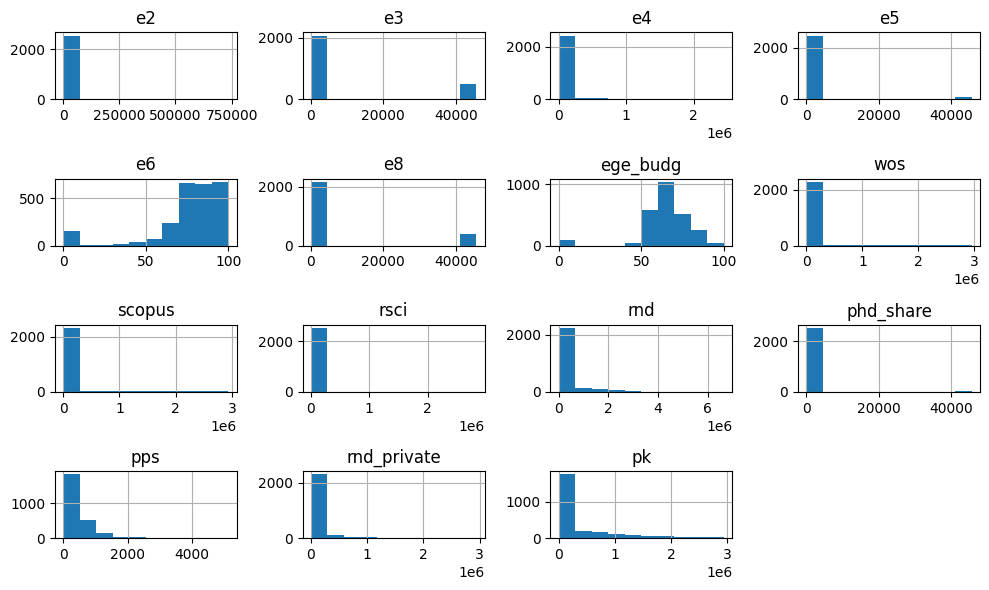

In [116]:
data.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

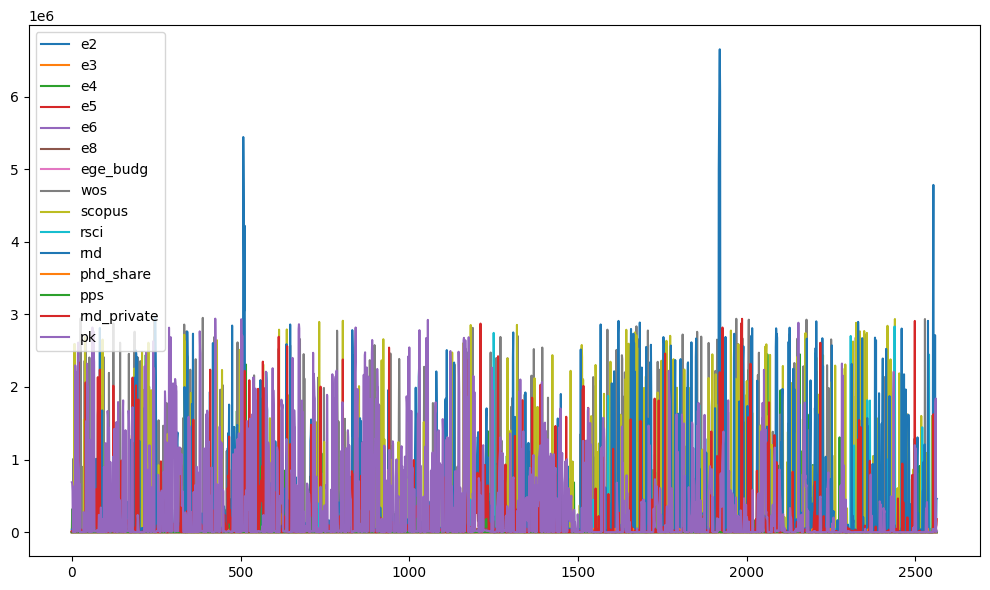

In [117]:
data.plot(figsize=(10, 6))
plt.tight_layout()
plt.show()

Видим явно аномальные значения признаков e2, e3, e8, заменим их c помощью квартилей


In [118]:
report2 = pd.DataFrame()
names = ['e2', 'e3', 'e8', ' ']
report2[names[0]] = pd.Series([data['e2'].min(), data['e2'].max(), data['e2'].median()])
report2[names[1]] = pd.Series([data['e3'].min(), data['e3'].max(), data['e3'].median()])
report2[names[2]] = pd.Series([data['e8'].min(), data['e8'].max(), data['e8'].median()])
report2[names[3]] = pd.Series(['min', 'max', 'median'])
report2

,e2,e3,e8,
0,0.000,0.00,0.00,min
1,735892.540,45645.00,45635.00,max
2,126.655,5.25,6.18,median


Разница между средним и максимальным значениями очень большая. Посчитаем соотношение большим и меньших среднего:


In [119]:
e2_counts = [v > data['e2'].mean() for v in data['e2']]
e3_counts = [v > data['e3'].mean() for v in data['e3']]
e8_counts = [v > data['e8'].mean() for v in data['e8']]
report3 = pd.DataFrame()
names = ['e2', 'e3', 'e8', ' ']
report3[names[0]] = pd.Series([e2_counts.count(0), e2_counts.count(1)])
report3[names[1]] = pd.Series([e3_counts.count(0), e3_counts.count(1)])
report3[names[2]] = pd.Series([e8_counts.count(0), e8_counts.count(1)])
report3[names[3]] = pd.Series(['меньше среднего', 'больше среднего'])
report3

,e2,e3,e8,
0,2504,2074,2170,меньше среднего
1,60,490,394,больше среднего


Относительно меньших среднего это действительно выбросы. Точки больше среднего заменим на медианное значение исходного датасета для лучшего прогностического качества будущей модели:


In [120]:
median_value_e2 = data['e2'].median()
new_e2 = [val if val <= median_value_e2 else median_value_e2 for val in data['e2']]

median_value_e3 = data['e3'].median()
new_e3 = [val if val <= median_value_e3 else median_value_e3 for val in data['e3']]

median_value_e8 = data['e8'].median()
new_e8 = [val if val <= median_value_e8 else median_value_e8 for val in data['e8']]

In [121]:
data_5['e2'] = new_e2
data_5['e3'] = new_e3
data_5['e8'] = new_e8
data_5.head(10)

,federal_district,e2,e3,e4,e5,e6,e8,ege_budg,wos,scopus,rsci,rnd,phd_share,pps,rnd_private,pk
0,Южный федеральный округ,75.55,5.25,2556.79,14.22,94.464,6.18,63.03,8.148000e+00,1.806000e+00,346.5420,34979.8,86.11,420,12016.20,687114.00
1,Южный федеральный округ,76.32,5.25,316057.00,142.78,55.000,6.18,57.60,1.572100e+01,2.973060e+01,591.9454,34739.6,88.74,398,11741.00,675456.00
2,Южный федеральный округ,86.40,5.25,2881.25,166.81,55.000,6.18,58.58,2.048200e+01,5.582500e+01,1323.0140,35750.5,88.72,385,19762.05,569505.00
3,Южный федеральный округ,84.80,5.25,1976.00,146.02,0.000,6.18,60.76,4.849000e+00,2.230540e+01,1456.9007,32631.6,90.93,373,21984.62,3514.65
4,Южный федеральный округ,109.27,5.25,2044.22,158.43,65.000,5.75,61.82,3.993000e+00,1.702470e+01,1014.9843,39626.1,90.36,363,27054.39,4179.00
5,Сибирский федеральный округ,64.30,1.66,1572.76,12.34,98.596,3.85,66.89,1.012545e+06,1.005120e+01,280.3168,20093.2,78.37,349,1539.09,575106.00
6,Сибирский федеральный округ,88.97,5.25,1706.28,146.99,75.000,3.74,62.26,1.052800e+00,7.336700e+00,519.9187,27982.1,79.32,329,648.13,3541.95
7,Сибирский федеральный округ,93.05,5.25,1768.28,153.10,75.000,3.48,62.58,4.126500e+00,1.543500e+01,662.4135,28496.1,78.80,315,27310.50,3475.65
8,Сибирский федеральный округ,82.44,2.37,1539.88,159.33,70.000,6.18,64.56,2.591579e+06,2.591579e+06,669.2005,28669.5,78.61,305,23951.65,636436.00
9,Сибирский федеральный округ,83.53,2.62,1570.19,160.01,70.000,3.79,64.85,7.262500e+04,7.473200e+00,1204.0958,28098.2,78.76,314,20881.00,3720.65


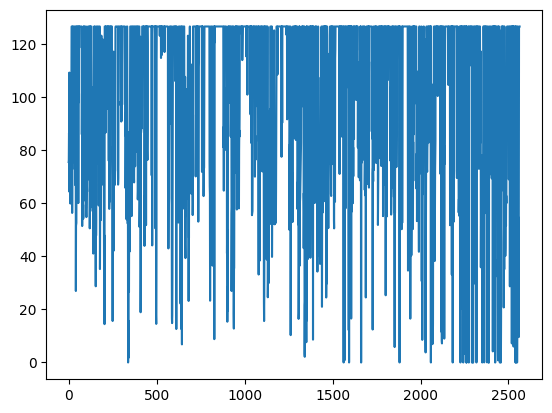

In [122]:
plt.plot(data_5['e2'])

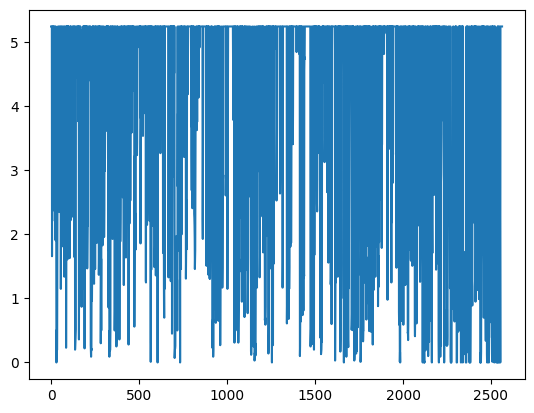

In [123]:
plt.plot(data_5['e3'])

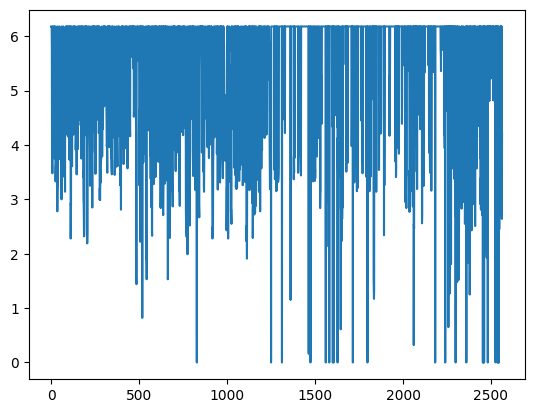

In [124]:
plt.plot(data_5['e8'])

Теперь данные в одном масштабе, без сильных искажений


## Работа с нечисловым признаком


Необходимо сделать федеральный округ признаком, чтобы использовать факт нахождения вуза на его территории одним из факторов, влияющих на средний балл.


Посмотрим, сколько есть округов в таблице:


In [125]:
data_5['federal_district'].value_counts()

federal_district
Центральный федеральный округ          815
Приволжский федеральный округ          459
Сибирский федеральный округ            339
Северо-западный федеральный округ      289
Уральский федеральный округ            193
Южный федеральный округ                191
Дальневосточный федеральный округ      147
Северо-Кавказский федеральный округ    131
Name: count, dtype: int64

Воспользуемся методом, разделяющим этот признак на столбцы принадлежности к той или иной категории (дамми-столбец)


In [126]:
data_5 = pd.concat([data_5, pd.get_dummies(data_5['federal_district'])], axis=1)

In [127]:
data_5.head(7)

,federal_district,e2,e3,e4,e5,e6,e8,ege_budg,wos,scopus,...,rnd_private,pk,Дальневосточный федеральный округ,Приволжский федеральный округ,Северо-Кавказский федеральный округ,Северо-западный федеральный округ,Сибирский федеральный округ,Уральский федеральный округ,Центральный федеральный округ,Южный федеральный округ
0,Южный федеральный округ,75.55,5.25,2556.79,14.22,94.464,6.18,63.03,8.148000e+00,1.8060,...,12016.20,687114.00,False,False,False,False,False,False,False,True
1,Южный федеральный округ,76.32,5.25,316057.00,142.78,55.000,6.18,57.60,1.572100e+01,29.7306,...,11741.00,675456.00,False,False,False,False,False,False,False,True
2,Южный федеральный округ,86.40,5.25,2881.25,166.81,55.000,6.18,58.58,2.048200e+01,55.8250,...,19762.05,569505.00,False,False,False,False,False,False,False,True
3,Южный федеральный округ,84.80,5.25,1976.00,146.02,0.000,6.18,60.76,4.849000e+00,22.3054,...,21984.62,3514.65,False,False,False,False,False,False,False,True
4,Южный федеральный округ,109.27,5.25,2044.22,158.43,65.000,5.75,61.82,3.993000e+00,17.0247,...,27054.39,4179.00,False,False,False,False,False,False,False,True
5,Сибирский федеральный округ,64.30,1.66,1572.76,12.34,98.596,3.85,66.89,1.012545e+06,10.0512,...,1539.09,575106.00,False,False,False,False,True,False,False,False
6,Сибирский федеральный округ,88.97,5.25,1706.28,146.99,75.000,3.74,62.26,1.052800e+00,7.3367,...,648.13,3541.95,False,False,False,False,True,False,False,False


In [128]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   federal_district                     2564 non-null   object 
 1   e2                                   2564 non-null   float64
 2   e3                                   2564 non-null   float64
 3   e4                                   2564 non-null   float64
 4   e5                                   2564 non-null   float64
 5   e6                                   2564 non-null   float64
 6   e8                                   2564 non-null   float64
 7   ege_budg                             2564 non-null   float64
 8   wos                                  2564 non-null   float64
 9   scopus                               2564 non-null   float64
 10  rsci                                 2564 non-null   float64
 11  rnd                           

Удалим столбец с названием округа, так как теперь это учтено в таблице


In [129]:
data_5 = data_5.drop(columns=['federal_district'])

In [130]:
data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   e2                                   2564 non-null   float64
 1   e3                                   2564 non-null   float64
 2   e4                                   2564 non-null   float64
 3   e5                                   2564 non-null   float64
 4   e6                                   2564 non-null   float64
 5   e8                                   2564 non-null   float64
 6   ege_budg                             2564 non-null   float64
 7   wos                                  2564 non-null   float64
 8   scopus                               2564 non-null   float64
 9   rsci                                 2564 non-null   float64
 10  rnd                                  2564 non-null   float64
 11  phd_share                     

## Построение моделей


Разделим датасет на целевую переменную и признаки


In [131]:
y = data_5['ege_budg']
X = data_5.drop(columns = ["ege_budg"])

Разделим на обучающую и тестовую выборки


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.005, random_state=42)

Выберем модели для обучения и опишем их для будущего отчёта:


In [133]:
report4 = pd.DataFrame()

Линейная модель:


In [134]:
start_time = time.time()
lr = LinearRegression()
lr.fit(X_train, y_train)
end_time = time.time()
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
elapsed_time = end_time - start_time
new_row = {'Model': f'LinearRegression', 'MSE': mse, 'MAE': mae, 'R2': r2, 'Time': elapsed_time}
report4 = pd.concat([report4, pd.DataFrame([new_row])], ignore_index=True)

In [135]:
report4

,Model,MSE,MAE,R2,Time
0,LinearRegression,62.047638,6.189223,0.013073,0.009002


Построим полиномиальные модели, выведем метрики их эффективности


In [136]:
for i in range(2, 5):
    start_time = time.time()
    poly = PolynomialFeatures(degree=i)
    model = Pipeline([('poly', poly), ('lr', LinearRegression())])
    model.fit(X_train, y_train)
    end_time = time.time()
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    elapsed_time = end_time - start_time
    new_row = {'Model': f'Polynomial Regression {i}', 'MSE': mse, 'MAE': mae, 'R2': r2, 'Time': elapsed_time}
    report4 = pd.concat([report4, pd.DataFrame([new_row])], ignore_index=True)

In [137]:
report4

,Model,MSE,MAE,R2,Time
0,LinearRegression,6.204764e+01,6.189223,1.307318e-02,0.009002
1,Polynomial Regression 2,1.566535e+02,8.511510,1.557736e+00,0.226005
2,Polynomial Regression 3,8.962613e+03,58.881999,1.453357e+02,6.288194
3,Polynomial Regression 4,2.026783e+11,134528.516450,3.309198e+09,16.093996


Как мы можем видеть, среднеквадратичная и абсолютная ошибки растут по мере увеличения степени, следовательно модели качество ухудшается, значит нет смысла строить полиномиальные модели более высоких степеней.


Построим регрессионную модель случайного леса:


In [138]:
start_time = time.time()
model = RandomForestRegressor(max_depth=2)
model.fit(X_train, y_train)
end_time = time.time()
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
elapsed_time = end_time - start_time
new_row = {'Model': f'RandomForestRegressor', 'MSE': mse, 'MAE': mae, 'R2': r2, 'Time': elapsed_time}
report4 = pd.concat([report4, pd.DataFrame([new_row])], ignore_index=True)

Построим модель метода регрессии лассо:


In [139]:
start_time = time.time()
model = LassoCV()
model.fit(X_train, y_train)
end_time = time.time()
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
elapsed_time = end_time - start_time
new_row = {'Model': f'LassoCV', 'MSE': mse, 'MAE': mae, 'R2': r2, 'Time': elapsed_time}
report4 = pd.concat([report4, pd.DataFrame([new_row])], ignore_index=True)

In [140]:
report4

,Model,MSE,MAE,R2,Time
0,LinearRegression,6.204764e+01,6.189223,1.307318e-02,0.009002
1,Polynomial Regression 2,1.566535e+02,8.511510,1.557736e+00,0.226005
2,Polynomial Regression 3,8.962613e+03,58.881999,1.453357e+02,6.288194
3,Polynomial Regression 4,2.026783e+11,134528.516450,3.309198e+09,16.093996
4,RandomForestRegressor,5.411640e+01,6.341132,1.164229e-01,0.883056
5,LassoCV,5.067677e+01,6.013546,1.725828e-01,0.104238


Итоговые выводы: благодаря предобратке данных, которую я провела, сейчас можно построить модели неплохого прогностического качества.


Модели имеют разную эффективность, лучше всего себя показали модель метода лассо, регрессионная модель случайного с небольшой глубиной дерева и обыкновенная линейная регрессия.


Ссылка на репозиторий, где можно посмотреть код в интерактивном формате:

https://github.com/likrias/course_project
